In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Loading Data

In [3]:
data = pd.read_csv(r'C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\yahoo_stock.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [5]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB


## Analyzing the trend

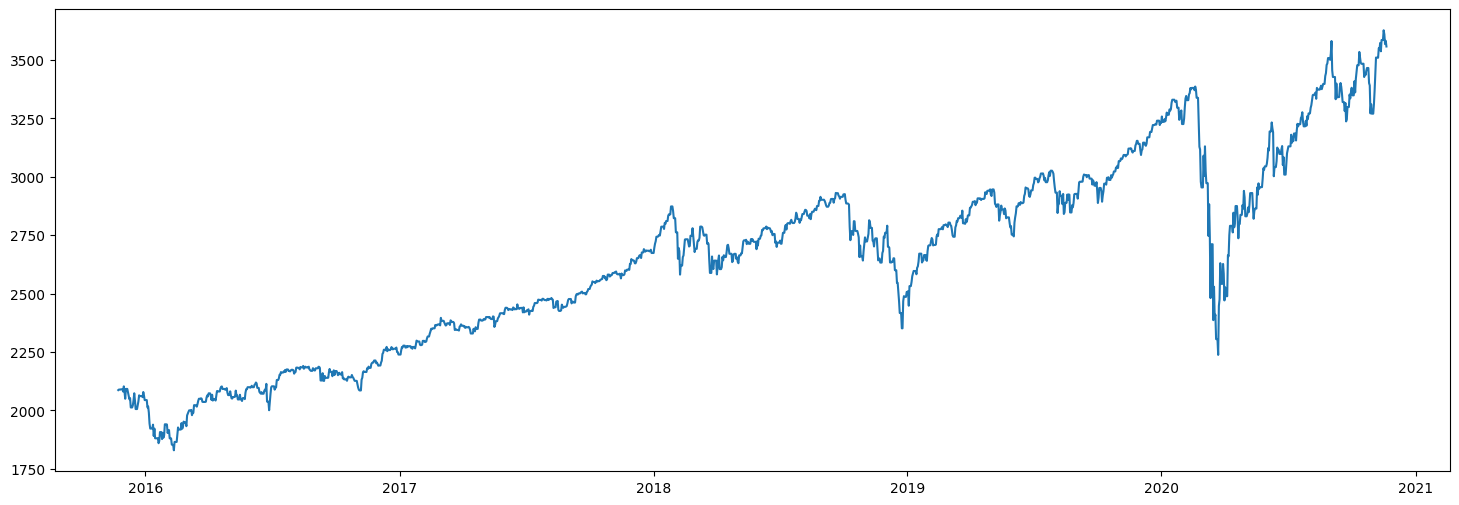

In [9]:
plt.figure(figsize=(18, 6))
plt.plot(data['Date'],data['Close'], label='Close Price' )


## Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
close_data = data[['Close']]
scaled_data = scaler.fit_transform(close_data)

## # Create sequences for LSTM

In [13]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [14]:
X.shape,y.shape

((1775, 50, 1), (1775, 1))

## Train_Test_Split

In [15]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model_Architecture

In [16]:
from tensorflow import keras
model = keras.Sequential([

    keras.layers.LSTM(units= 50 ,return_sequences = True,input_shape = (X_train.shape[1],X_train.shape[2])),
    keras.layers.Dropout(0.3), 

    keras.layers.LSTM(units= 50 ,return_sequences = True), 
    keras.layers.Dropout(0.3), 

    keras.layers.LSTM(units= 50 ,return_sequences = False),      
    keras.layers.Dropout(0.3), 

    keras.layers.Dense(y_train.shape[1], activation='linear')
        ])

C:\Users\Bhaypreet\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss',patience = 15, restore_best_weights = True,verbose = True)

## Training_Starts

In [ ]:
model.fit(X_train,y_train,validation_split = 0.2,epochs = 30 , callbacks = [early_stopping])


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 1.4854e-04 - loss: 0.0517 - val_accuracy: 0.0000e+00 - val_loss: 0.0172
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 7.1714e-05 - loss: 0.0052 - val_accuracy: 0.0000e+00 - val_loss: 0.0043
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 5.5353e-04 - loss: 0.0035 - val_accuracy: 0.0000e+00 - val_loss: 0.0020
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.0027 - loss: 0.0029 - val_accuracy: 0.0000e+00 - val_loss: 8.0342e-04
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.0011 - loss: 0.0026 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 1.7579e-04 - loss: 0.0026 - val_accuracy: 0.0000e+00 - val_loss: 0.0043
Epoch 7/30
16/36 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.2207e-04 - loss: 0.0023

In [ ]:
loss = model.evaluate(X_test, y_test)
print("Test_loss" ,loss)

In [ ]:
y_pred = model.predict(X_test)

## Denormalization

In [ ]:
y_preds = scaler.inverse_transform(y_pred)
y_tests = scaler.inverse_transform(y_test)

In [ ]:
dates = data['Date'].iloc[sequence_length:].reset_index(drop=True)
split = int(0.8 * len(X))
dates_test = dates[split:].reset_index(drop=True)


## Actual vs Predicted Plot

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(dates_test, y_tests, label='Actual')
plt.plot(dates_test, y_preds, label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mae,mse,rmse,r2)